<h1> Airlines Satisfaction analysis </h1>

### Table of Contents 
* [Goals](#goals)
* [Data](#Data)

 <h3> Goals </h3> <a class="anchor" id="Goals"></a>

In this notebook a customer satisfaction analysis on an airline will be done. The questions of this project are the following:

* Which are the factors that increase customer satisfaction?
* Are there factors that affect the satisfaction more than others?



<h3> Data </h3> <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:
<br> https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction </br>
    

In [75]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
pd.set_option('display.max_columns', None)
import missingno as msno
import scipy.stats as st 
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [2]:
# Let's start by importing the dataset 
df= pd.read_csv('Invistico_Airline.csv')

Only the Arrival Delay in Minutes contains 0 values in this case 393 values.

<AxesSubplot:>

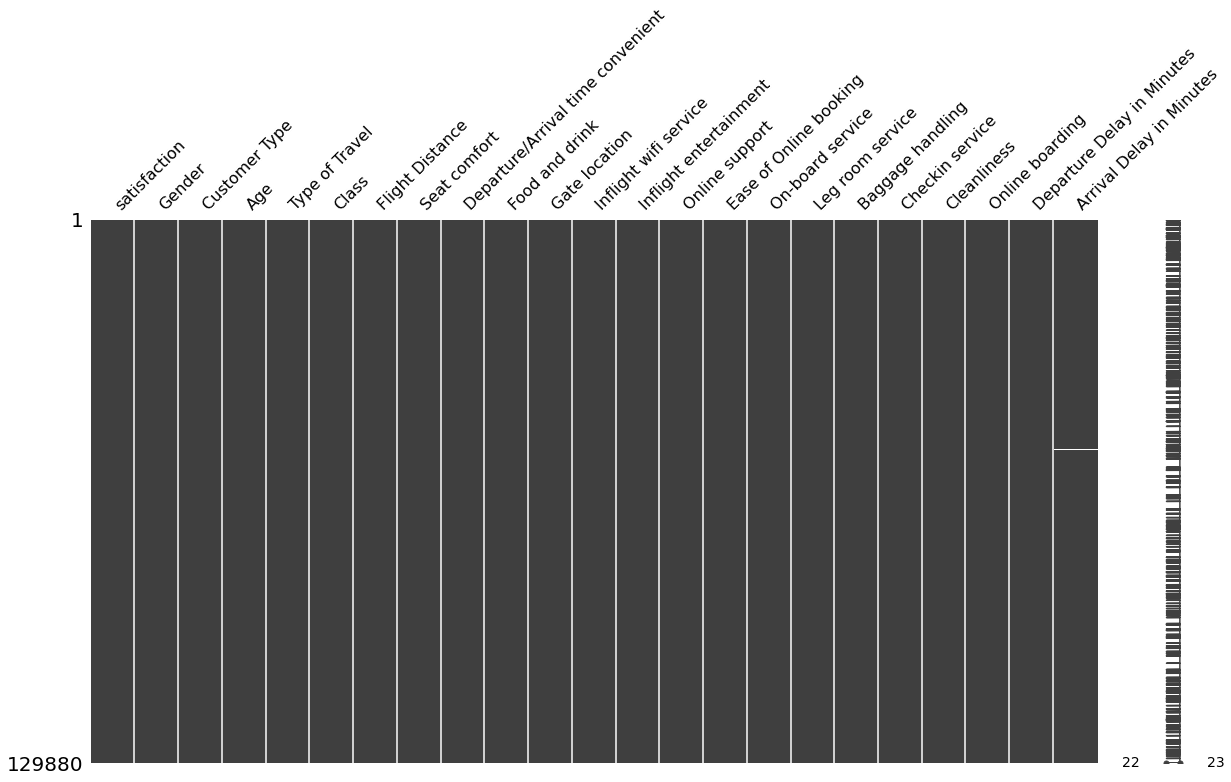

In [3]:
# Let's plot the graphic of the missing values to visualize it in a better way:
import missingno
missingno.matrix(df, figsize = (20,10))

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Count'>

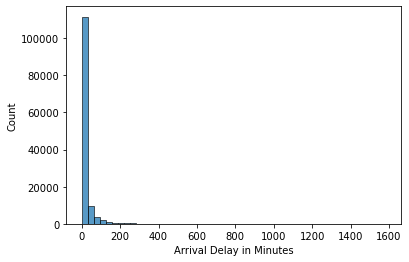

In [4]:
sns.histplot(df, x = "Arrival Delay in Minutes", bins=50)

<h2> Exploratory Data Analysis </h2>

<h3> Initial Data Inspection </h3>

In [5]:
# Now let's take a look at the first 5 rows
df.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


<h3> Data Information </h3>

* How many (non-null) observations do we have?
* How many unique columns / features do we have?
* Which columns (if any) contain missing data?
* What is the data type of each column?

In [6]:
df.describe(include='all')

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
unique,2,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,satisfied,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71087,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,39.427957,NaN,NaN,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,NaN,NaN,NaN,15.119360,NaN,NaN,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,NaN,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,27.000000,NaN,NaN,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,NaN,NaN,NaN,40.000000,NaN,NaN,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,NaN,NaN,NaN,51.000000,NaN,NaN,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


In [7]:
print(df.shape)
print(df.info())

(129880, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service     

The Dataset contains 22 columns and 129880 rows in the dataset, from which 1 is a float (Arrival Delay in Minutes) 17 are int columns and 5 are objects. Let's check for 0 values:

In [8]:
#We can see the dataset has 23 columns but let's take a closer look at what are those:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

From the Kaggle dataset description we see that these columns represent:

* satisfaction: if the customer is satisfied or disatisfied with the arline service.
* Gender: the gender of the person (m/f).
* Customer Type: if the person is a loyal or disloyal customer.
* Age: the age of the customer.
* Type of Travel: if the travel was a personal or a business travel.
* Class: if the trip was done in Business, Economic or another class.
* Flight Distance: the number of miles the customer traveled on that trip.
* Seat comfort: the perceived seat's comfort measured from 0 to 5.
* Departure/Arrival time convenient: perception of the departure, or arrival time from 0 to 5.
* Food and drink: food and drink services measured from 0 to 5. 
* Gate location: perception of the gate's location from 0 to 5.
* Inflight wifi service: perception of the wifi experience during the flight from 0 to 5.
* Inflight entertainment: perception of the inflight entertainment from 0 to 5.
* Online support: perception of the online support from 0 to 5.
* Ease of Online booking: how easy was for the customer to book his flight from 0 to 5.
* On-board service: perception of onboarding service from 0 to 5.
* Leg room service: satisfaction with the leg room space from 0 to 5.
* Baggage handling: handling of the baggage from 0 to 5.
* Checkin service: service perception during the checkin from 0 to 5.
* Cleanliness: cleanliness perception during the flight experience from 0 t0 5. 



* numerical features: Age, Flight Distance, Seat Comfort, Departure/Arrival time convenient, Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service, Baggage handling, Checkin service, Cleanliness, Online boarding, Departure Delay in Minutes, Arrival Delay in Minutes.

* categorical features: satisfaction, Gender, Customer Type, Type of Travel, Class 

<h3> Inspecting Missing Data </h3> 

In [9]:
df[df.isnull().any(axis=1)]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,4,5,0,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,4,2,0,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,3,5,0,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,4,3,0,3,3,5,3,4,4,4,3,0,NaN
818,dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,1,4,1,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,satisfied,Male,Loyal Customer,44,Business travel,Business,3431,2,2,3,2,2,2,4,5,5,5,5,5,5,4,70,NaN
128131,satisfied,Male,Loyal Customer,39,Business travel,Business,1595,4,4,4,4,2,4,5,5,5,5,5,3,5,5,0,NaN
128710,satisfied,Female,Loyal Customer,45,Business travel,Eco,871,5,1,1,1,5,5,2,5,5,5,5,1,5,5,100,NaN
129774,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,1594,5,4,5,2,3,5,3,3,1,4,3,3,4,3,0,NaN


In [10]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [11]:
#another form of obtaining missing values with a function 
def find_missing_values(df, columns) :
    missing_vals = {}
    print("Number of missing of NaN values for each column: ")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
    return missing_vals
missing_values= find_missing_values(df, columns = df.columns)
missing_values

Number of missing of NaN values for each column: 


{'satisfaction': 0,
 'Gender': 0,
 'Customer Type': 0,
 'Age': 0,
 'Type of Travel': 0,
 'Class': 0,
 'Flight Distance': 0,
 'Seat comfort': 0,
 'Departure/Arrival time convenient': 0,
 'Food and drink': 0,
 'Gate location': 0,
 'Inflight wifi service': 0,
 'Inflight entertainment': 0,
 'Online support': 0,
 'Ease of Online booking': 0,
 'On-board service': 0,
 'Leg room service': 0,
 'Baggage handling': 0,
 'Checkin service': 0,
 'Cleanliness': 0,
 'Online boarding': 0,
 'Departure Delay in Minutes': 0,
 'Arrival Delay in Minutes': 393}

In [12]:
variance = np.var(df)
variance

Age                                  2.285933e+02
Flight Distance                      1.054958e+06
Seat comfort                         1.940387e+00
Departure/Arrival time convenient    2.332396e+00
Food and drink                       2.084338e+00
Gate location                        1.705544e+00
Inflight wifi service                1.739266e+00
Inflight entertainment               1.811861e+00
Online support                       1.706957e+00
Ease of Online booking               1.704473e+00
On-board service                     1.615011e+00
Leg room service                     1.669835e+00
Baggage handling                     1.337444e+00
Checkin service                      1.589055e+00
Cleanliness                          1.326573e+00
Online boarding                      1.686646e+00
Departure Delay in Minutes           1.449399e+03
Arrival Delay in Minutes             1.479595e+03
dtype: float64

(array([1.23141e+05, 4.53200e+03, 1.17700e+03, 3.73000e+02, 1.48000e+02,
        6.60000e+01, 1.60000e+01, 1.30000e+01, 4.00000e+00, 4.00000e+00,
        4.00000e+00, 3.00000e+00, 3.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0. ,   79.2,  158.4,  237.6,  316.8,  396. ,  475.2,  554.4,
         633.6,  712.8,  792. ,  871.2,  950.4, 1029.6, 1108.8, 1188. ,
        1267.2, 1346.4, 1425.6, 1504.8, 1584. ]),
 <BarContainer object of 20 artists>)

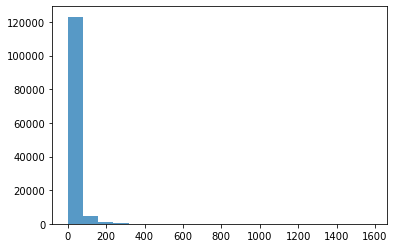

In [13]:
plt.hist(df['Arrival Delay in Minutes'],alpha= 0.75, label = 'Arrival Delay', bins=20)

In [14]:
modes=[]
for col in df.columns:
    top_values=[]
    top_values=df[col].mode()
    modes.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
    pd.concat(modes, axis=1)
   

<h3> Data Cleaning and Tyding </h3>

In [15]:
df['Arrival Delay in Minutes'].nunique()

472

In [16]:
#df.replace(0, np.nan)
df['Arrival Delay in Minutes']= df['Arrival Delay in Minutes'].replace(0, np.nan)
df['Arrival Delay in Minutes']= df['Arrival Delay in Minutes'].dropna

In [17]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


In [18]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Arrival Delay in Minutes'])


TypeError: Horizontal orientation requires numeric `x` variable.

In [ ]:
sns.histplot(df,x = "Arrival Delay in Minutes", bins=50)

In [ ]:
corr_matrix = df.corr()

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, cbar=True, square= True, annot=True, fmt='.2f',annot_kws={'size':10},cmap='Purples')
plt.title('Matrix of Correlations between variables', fontsize=20)
#plt.xlabel('Variables')
#plt.ylabel('Variables')
plt.xticks(rotation = 45)
plt.yticks(rotation =45)
plt.show()

In [19]:
numeric_features= df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')

In [67]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [20]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Arrival Delay in Minutes'],
      dtype='object')

In [68]:
categorical_features.describe().T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160
Arrival Delay in Minutes,129880,1,<bound method Series.dropna of 0 NaN...,129880


In [25]:
df.shape

(129880, 23)

In [28]:
#estimate Skewness and Kurtosis
df.skew(), df.kurt()

(Age                                 -0.003606
 Flight Distance                      0.466748
 Seat comfort                        -0.091861
 Departure/Arrival time convenient   -0.252282
 Food and drink                      -0.116813
 Gate location                       -0.053064
 Inflight wifi service               -0.191123
 Inflight entertainment              -0.604828
 Online support                      -0.575365
 Ease of Online booking              -0.491720
 On-board service                    -0.505270
 Leg room service                    -0.496440
 Baggage handling                    -0.743037
 Checkin service                     -0.392442
 Cleanliness                         -0.756001
 Online boarding                     -0.366496
 Departure Delay in Minutes           6.821980
 dtype: float64,
 Age                                   -0.719140
 Flight Distance                        0.364306
 Seat comfort                          -0.943193
 Departure/Arrival time convenient   

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4138: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))
/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-pa

<AxesSubplot:title={'center':'Log Normal'}, xlabel='Departure Delay in Minutes'>

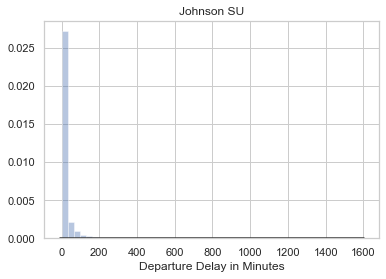

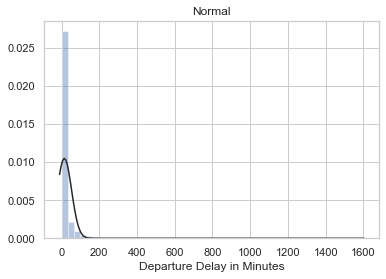

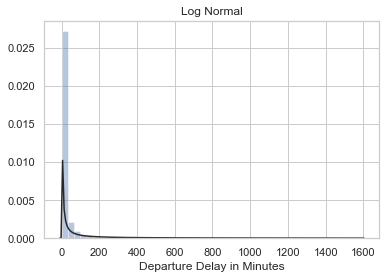

In [35]:
y=df['Departure Delay in Minutes']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

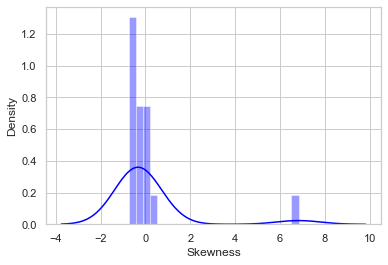

In [37]:
sns.distplot(df.skew(),color='blue',axlabel='Skewness')

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


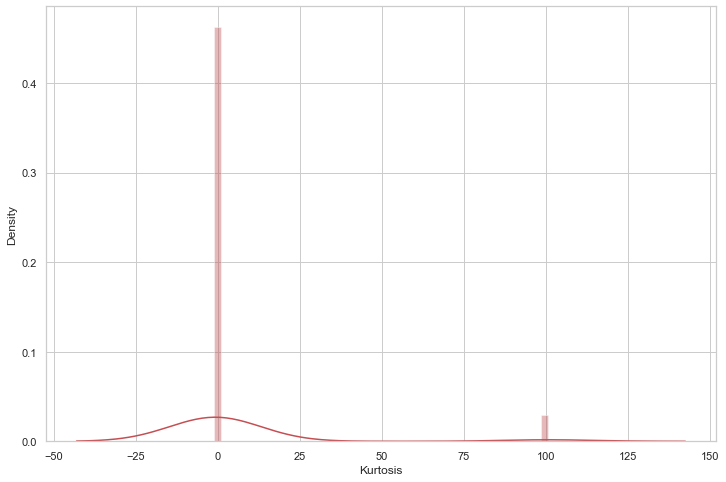

In [41]:
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='r',axlabel='Kurtosis',norm_hist= False, kde= True, rug= False)
plt.show()

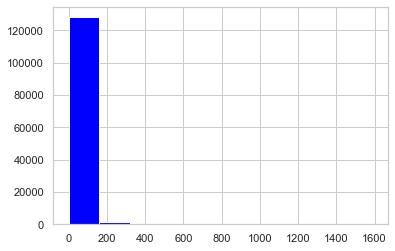

In [42]:
plt.hist(df['Departure Delay in Minutes'], orientation='vertical', histtype = 'bar', color= 'blue')
plt.show()

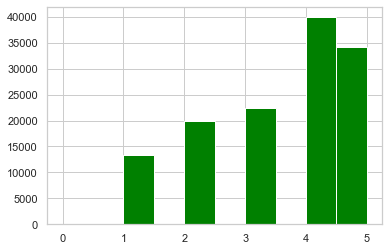

In [44]:
plt.hist(df['Ease of Online booking'], orientation='vertical', histtype = 'bar', color= 'green')
plt.show()

In [50]:
#Finding correlation coefficients between numeric features and Departure Delay in Minutes 
correlation = numeric_features.corr()
print(correlation['Departure Delay in Minutes'].sort_values(ascending = False),'\n')

Departure Delay in Minutes           1.000000
Flight Distance                      0.112555
Departure/Arrival time convenient    0.004395
Gate location                        0.003962
Leg room service                     0.003660
Age                                 -0.009041
Baggage handling                    -0.009985
Food and drink                      -0.013433
Online boarding                     -0.020045
Checkin service                     -0.020896
Seat comfort                        -0.023817
Inflight entertainment              -0.030491
Inflight wifi service               -0.032900
Online support                      -0.034018
Ease of Online booking              -0.036545
On-board service                    -0.037641
Cleanliness                         -0.062134
Name: Departure Delay in Minutes, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Numeric Features with Departure Delay'}>

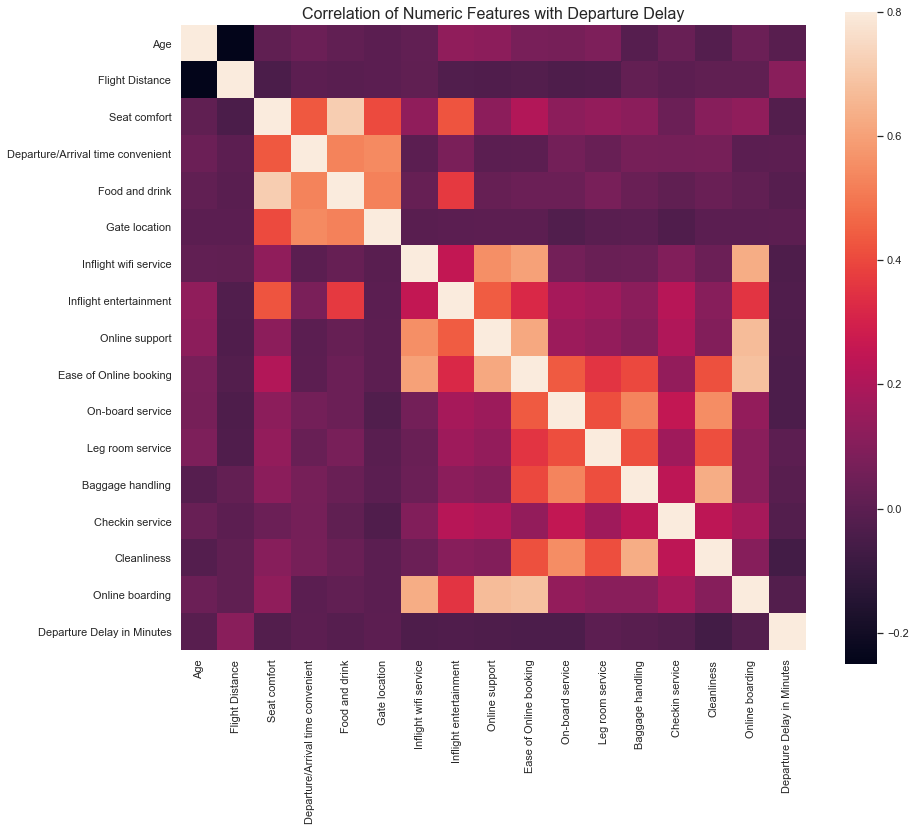

In [51]:
#Correlation Heat Map 
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Departure Delay',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

Index(['Departure Delay in Minutes', 'Flight Distance',
       'Departure/Arrival time convenient', 'Gate location',
       'Leg room service', 'Age', 'Baggage handling', 'Food and drink',
       'Online boarding', 'Checkin service', 'Seat comfort'],
      dtype='object')


<AxesSubplot:>

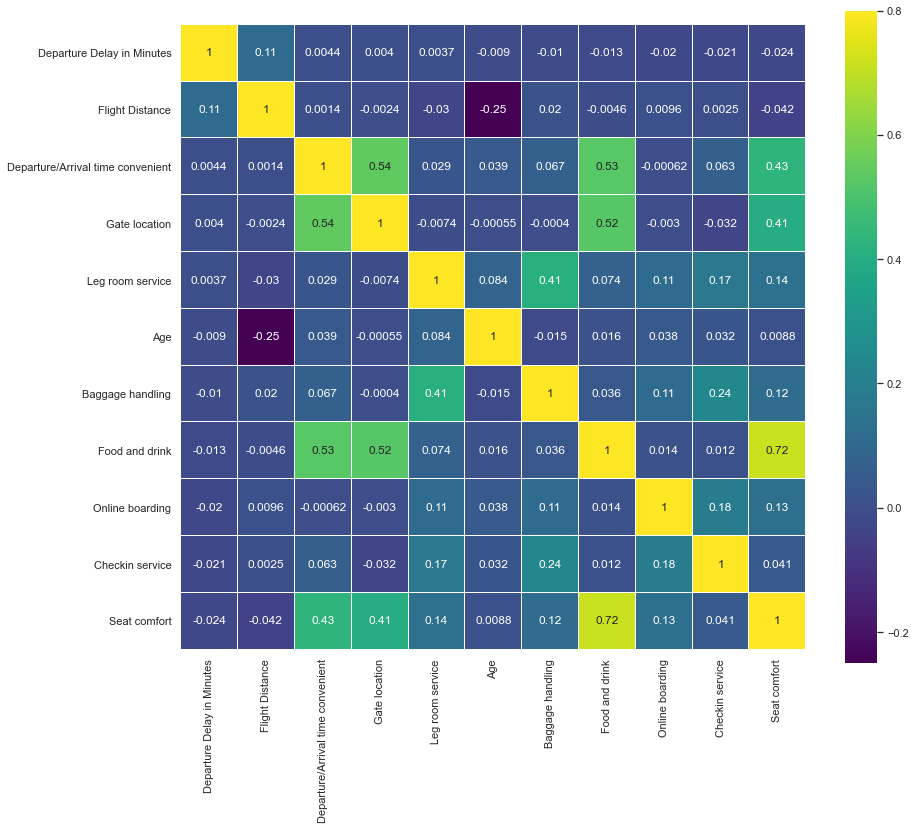

In [53]:
#Zoomed HeatMap
# Departure Delay Correlation Matrix 
k= 11
cols = correlation.nlargest(k,'Departure Delay in Minutes')['Departure Delay in Minutes'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [ ]:
#Observations

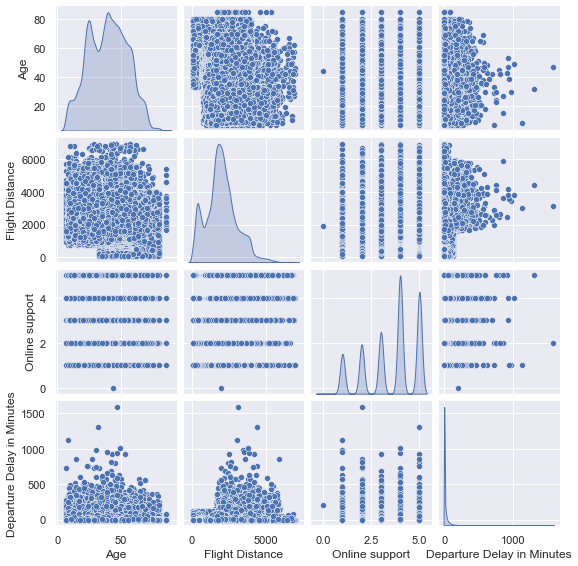

In [56]:
#Pair Plot
# Pair Plot between 'Departure Delay' and correlated variables

sns.set()
columns= ['Age', 'Flight Distance', 'Online support','Departure Delay in Minutes']
sns.pairplot(df[columns],height = 2, kind='scatter', diag_kind= 'kde')
plt.show()

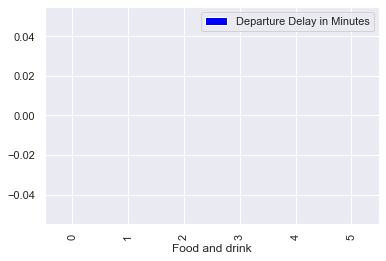

In [66]:
type_delay = df.pivot_table(index='Food and drink', values = 'Departure Delay in Minutes', aggfunc=np.median)
type_delay.plot(kind = 'bar',color='blue')
plt.show()


<AxesSubplot:>

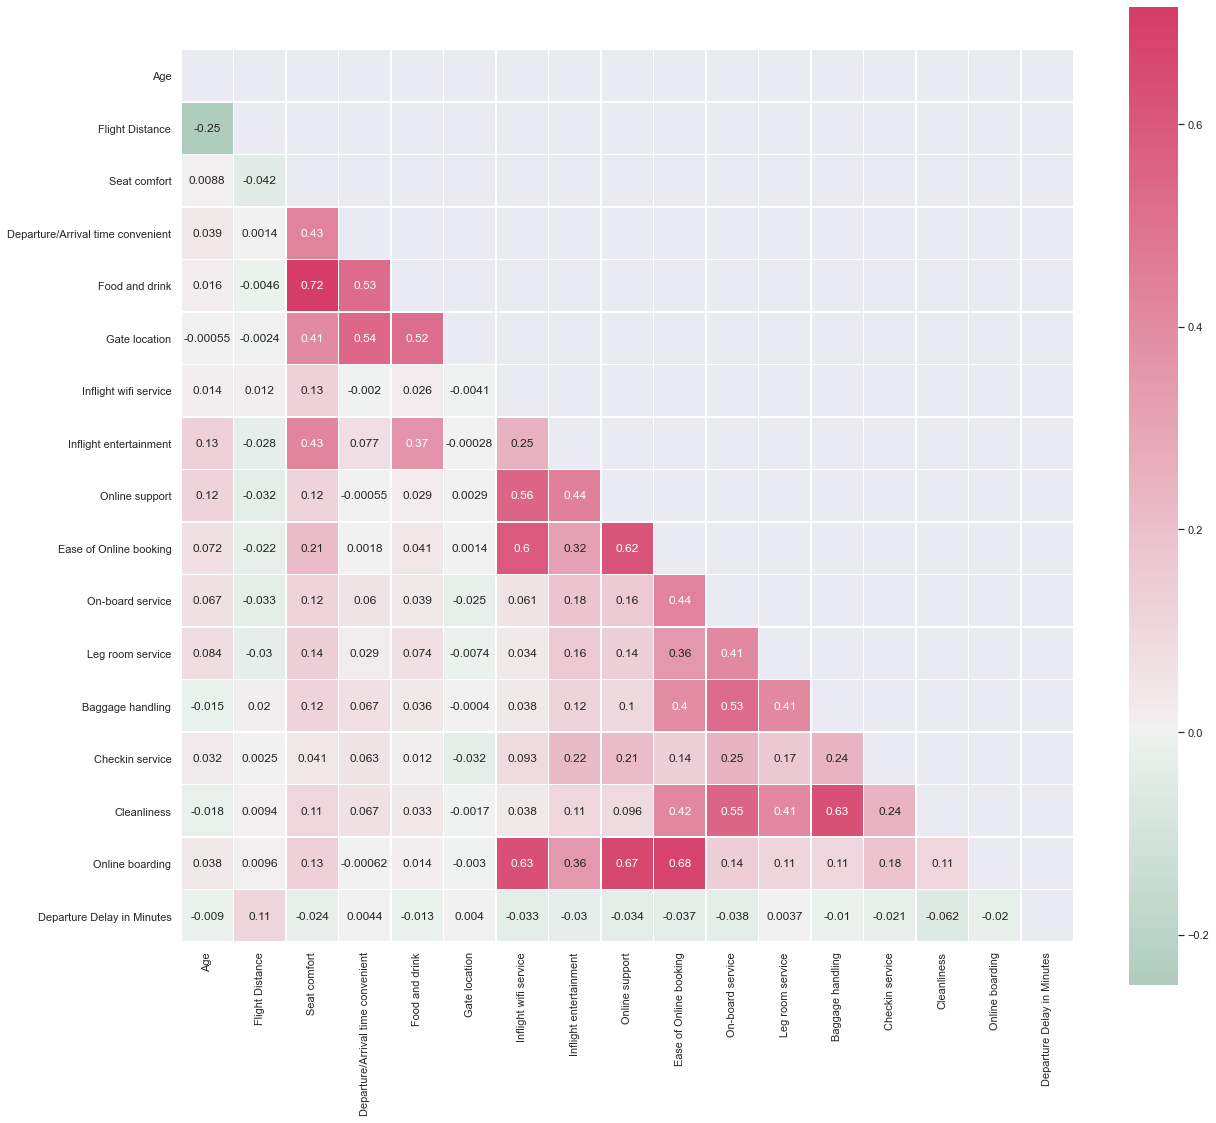

In [72]:
#Correlation among Features
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [73]:
#How Many People is Satisfied and Dissatisfied?
fig=px.pie(df,values=df["satisfaction"].value_counts(),names=["Satisfied","Dissatisfied"], title="<b>Satisfied And Dissatisfied Ratio",hole=.72, color_discrete_sequence = px.colors.qualitative.Pastel, template="plotly")
fig.update_layout(title_font_size=30)
fig.show()

NameError: name 'px' is not defined

In [76]:
#Satisfaction by Gender
fig= px.histogram(df,x="Gender", facet_col="satisfaction", color= "satisfaction", color_discrete_sequence= px.colors.qualitative.Alphabet)
fig.update_layout(title="<b>"+"Gender satisfaction", title_font_size= 18, font_size=14, title_x = 0.5, hoverlabel_font_size =20, template= "plotly")
fig.show()

NameError: name 'px' is not defined